In [1]:
# Download the required built-in modules
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Download the required built-in modules
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# List the columns in the Measurement table
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cf93cadc70>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1}

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc())
recent_date[0][0]

'2017-08-23'

In [11]:
# Convert the string to date, for calculating the date from last year
recent_date_dt = dt.datetime.strptime(recent_date[0][0], '%Y-%m-%d').date()
recent_date_dt

datetime.date(2017, 8, 23)

In [12]:
# Calculate the date one year from the last date in data set.
recent_dt_last_yr = recent_date_dt - dt.timedelta(days=365)
recent_dt_last_yr

datetime.date(2016, 8, 23)

In [13]:
# Convert the date to string, to use in the session query
date_last_yr = recent_dt_last_yr.strftime('%Y-%m-%d')
date_last_yr

'2016-08-23'

In [14]:
# Perform a query to retrieve the date and precipitation scores for the last 12 months
data_12_months = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= date_last_yr)
for i in data_12_months:
    print(i.date, i.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_12_months = pd.DataFrame(data_12_months, columns = ["Date", "Precipitation"])
prcp_12_months.set_index(["Date"],inplace=True)
prcp_12_months

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [16]:
# Sort the dataframe by date
prcp_12_months.sort_index(inplace=True)
prcp_12_months

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


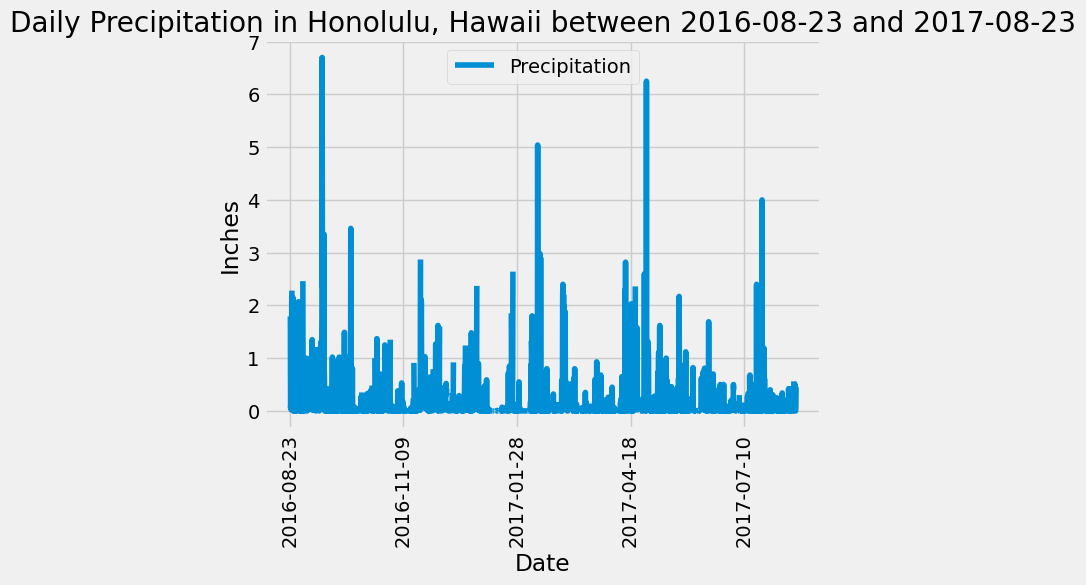

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_12_months.plot(ylabel="Inches", rot=90)
plt.title(f"Daily Precipitation in Honolulu, Hawaii between {recent_dt_last_yr} and {recent_date_dt}")
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_12_months.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# List the columns in the Station table
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cf95cf2670>,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [20]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [23]:
# Calculate the lowest, highest and average temperatures of the most active station
temp_data = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.station == most_active_station).all()
temp_data

[(54.0, 71.66378066378067, 85.0)]

In [24]:
# Print the results
print(f"The lowest, highest and average temp of the most active station {most_active_station} are as follows:")
print(f"Lowest temperature: {temp_data[0][0]}")
print(f"Highest temperature: {temp_data[0][2]}")
print(f"Average temperature: {temp_data[0][1]}")

The lowest, highest and average temp of the most active station USC00519281 are as follows:
Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date >= date_last_yr).all()
temp_observation

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_12_months = pd.DataFrame(temp_observation, columns = ["Date", "Temperature"])
tobs_12_months

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


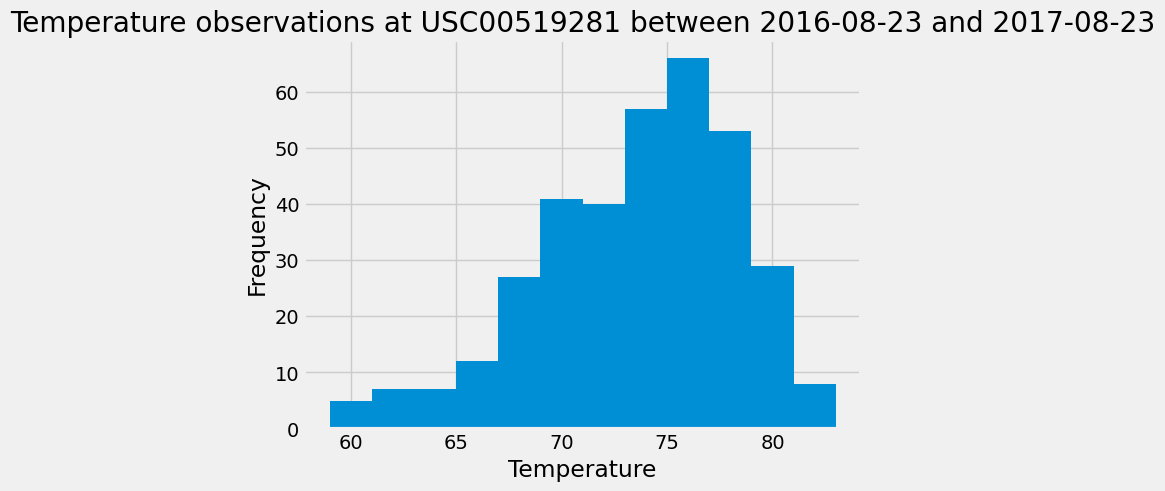

In [27]:
tobs_12_months.hist(bins=12, column="Temperature")
plt.title(f"Temperature observations at {most_active_station} between {recent_dt_last_yr} and {recent_date_dt}")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [28]:
# Close Session
session.close()